# DonorsChoose
### Assignment-5: Apply Logistic Regression on Donors Choose dataset 
### abhipise2704@gmail.com_5

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

# 1 Data Preprocessing 

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [4]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [5]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 19)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'
 'price' 'quantity']


In [6]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,725.05,4
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,213.03,8


In [7]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [8]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [9]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 preprocessing of `Project_Grade_Category`

In [10]:
#https://www.kaggle.com/naveennagari/donorschoose-eda-and-tsne/notebook

cleaned_Grades=[]
for grade in tqdm(project_data['project_grade_category'].values):
    grade = grade.replace(' ', '_')
    grade = grade.replace('-', '_')
    cleaned_Grades.append(grade)
project_data['cleaned_Grades']=cleaned_Grades


project_data.drop(['project_grade_category'], axis=1, inplace=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 471195.09it/s]


In [11]:
project_data['cleaned_Grades'][:5]

55660    Grades_PreK_2
76127       Grades_3_5
51140    Grades_PreK_2
473      Grades_PreK_2
41558       Grades_3_5
Name: cleaned_Grades, dtype: object

## 1.4 preprocessing of `School State`

In [12]:
from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
    
state__ = dict(my_counter)
sorted_state_dict = dict(sorted(state__.items(), key=lambda kv: kv[1]))

## 1.5 preprocessing of `Teacher Prefix`

In [13]:
#https://towardsdatascience.com/5-methods-to-remove-the-from-your-data-in-python-and-the-fastest-one-281489382455

project_data['teacher_prefix_clean']=project_data.teacher_prefix.str.replace('.','')


#https://stackoverflow.com/questions/23158447/convert-float-to-string-in-pandas

project_data['teacher_prefix_clean'] = project_data['teacher_prefix_clean'].astype(str)

from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix_clean'].values:
    my_counter.update(word.split())
    

teacher_dict = dict(my_counter)
sorted_teacher_dict = dict(sorted(teacher_dict.items(), key=lambda kv: kv[1]))


project_data.drop(['teacher_prefix'], axis=1, inplace=True)

## 1.6 Text preprocessing of `essay`

In [14]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [15]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,school_state,Date,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,cleaned_Grades,teacher_prefix_clean,essay
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,CA,2016-04-27 00:27:36,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,725.05,4,Math_Science,AppliedSciences Health_LifeScience,Grades_PreK_2,Mrs,I have been fortunate enough to use the Fairy ...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,UT,2016-04-27 00:31:25,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,213.03,8,SpecialNeeds,SpecialNeeds,Grades_3_5,Ms,Imagine being 8-9 years old. You're in your th...


In [2]:
#### Using Pretrained Models: TFIDF weighted W2V

In [17]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[15000])
print("="*50)
print(project_data['essay'].values[40000])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [18]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [20]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [21]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [22]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [23]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [02:17<00:00, 794.55it/s]


In [24]:
# after preprocesing
project_data['preprocessed_essays']=preprocessed_essays

In [25]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,school_state,Date,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,...,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,cleaned_Grades,teacher_prefix_clean,essay,preprocessed_essays
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,CA,2016-04-27 00:27:36,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,...,53,1,725.05,4,Math_Science,AppliedSciences Health_LifeScience,Grades_PreK_2,Mrs,I have been fortunate enough to use the Fairy ...,fortunate enough use fairy tale stem kits clas...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,UT,2016-04-27 00:31:25,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,...,4,1,213.03,8,SpecialNeeds,SpecialNeeds,Grades_3_5,Ms,Imagine being 8-9 years old. You're in your th...,imagine 8 9 years old third grade classroom se...


In [26]:
project_data['preprocessed_essays'][:10]


55660    fortunate enough use fairy tale stem kits clas...
76127    imagine 8 9 years old third grade classroom se...
51140    class 24 students comes diverse learners stude...
473      recently read article giving students choice l...
41558    students crave challenge eat obstacles breakfa...
29891    end school year routines run course students n...
81565    sitting still overrated makes sense opera medi...
79026    not enough read book write essay connect deepl...
23374    never society rapidly changed technology invad...
86551    remember first time saw star wars wall e robot...
Name: preprocessed_essays, dtype: object

<h2><font color='black'> 1.7 Text Preprocessing of `project_title`</font></h2>

In [27]:
# similarly you can preprocess the titles also

In [28]:
project_data['project_title'][:10]

55660         Engineering STEAM into the Primary Classroom
76127                              Sensory Tools for Focus
51140       Mobile Learning with a Mobile Listening Center
473                 Flexible Seating for Flexible Learning
41558               Going Deep: The Art of Inner Thinking!
29891                   Breakout Box to Ignite Engagement!
81565    Flexible Seating: An Environment to Help Kids ...
79026                21st Century Learning with Multimedia
23374                                    iPad for Learners
86551                      Dash and Dot Robotic Duo Needed
Name: project_title, dtype: object

In [29]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [30]:
sent_project_title = decontracted(project_data['project_title'].values[1000])
print(sent_project_title)
print("="*50)

Empowering Students Through Art:Learning About Then and Now


In [31]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent_project_title = sent_project_title.replace('\\r', ' ')
sent_project_title = sent_project_title.replace('\\"', ' ')
sent_project_title = sent_project_title.replace('\\n', ' ')
print(sent_project_title)

Empowering Students Through Art:Learning About Then and Now


In [32]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent_project_title = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent_project_title)

first graders eager learn world around come school day full enthusiasm genuinely love learning diverse class includes students variety cultural economic backgrounds Many come homes parents not afford simply not know importance books important provide environment rich literature students learn love reading want students lifelong learners reading best way used magazines past kids absolutely LOVE topics high interest children always correspond real world issues important kids learn subscription also includes online resources videos printable worksheets skill based games materials expose students rigorous interesting nonfiction text spark curiosity world around topics allow teach nonfiction text standards using interesting materials always lead engaging discussions inspire students find additional information various topics nannan


In [33]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [34]:
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent_project_title = decontracted(sentance)
    sent_project_title = sent_project_title.replace('\\r', ' ')
    sent_project_title = sent_project_title.replace('\\"', ' ')
    sent_project_title = sent_project_title.replace('\\n', ' ')
    sent_project_title = re.sub('[^A-Za-z0-9]+', ' ', sent_project_title)
    # https://gist.github.com/sebleier/554280
    sent_project_title = ' '.join(e for e in sent_project_title.split() if e not in stopwords)
    preprocessed_project_title.append(sent_project_title.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [00:07<00:00, 15417.85it/s]


In [35]:
preprocessed_project_title[1000]

'empowering students through art learning about then now'

In [36]:
project_data['preprocessed_project_title']=preprocessed_project_title

In [37]:
project_data['preprocessed_project_title'][:10]

55660                engineering steam primary classroom
76127                                sensory tools focus
51140            mobile learning mobile listening center
473                   flexible seating flexible learning
41558                  going deep the art inner thinking
29891                     breakout box ignite engagement
81565    flexible seating an environment help kids learn
79026                   21st century learning multimedia
23374                                      ipad learners
86551                        dash dot robotic duo needed
Name: preprocessed_project_title, dtype: object

<h2><font color='black'> 1.8 Sentiment Score of Essays </font></h2>

In [38]:
#https://www.youtube.com/watch?v=qTyj2R-wcks
#https://www.kaggle.com/rohit0812/logistic-regression-on-donor-s-choose/notebook
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
#https://github.com/varma1993/ML-Projects/blob/master/DonorsChoose/Logistic%20Regression/5_DonorsChoose_LR_final.ipynb
#http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

project_data['sentiment_score'] = 0
project_data['sentiment_score'] = project_data['sentiment_score'].astype(float)

sentiment_analyzer = SentimentIntensityAnalyzer()

for index in tqdm(project_data.index):
    project_data.at[index, 'sentiment_score'] = sentiment_analyzer.polarity_scores(project_data.at[index,'preprocessed_essays'])['compound']

print(project_data.head(2))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [06:51<00:00, 265.55it/s]


       Unnamed: 0       id                        teacher_id school_state  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           CA   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df           UT   

                     Date                                 project_title  \
55660 2016-04-27 00:27:36  Engineering STEAM into the Primary Classroom   
76127 2016-04-27 00:31:25                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   


<h2><font color='black'> 1.9 Number of Words in Essays </font></h2>

In [ ]:
#https://stackoverflow.com/questions/54397096/how-to-do-word-count-on-pandas-dataframe

project_data['number_words_essays']=project_data['preprocessed_essays'].str.count(' ')+1

<h2><font color='black'> 1.10 Number of Words in Project Title </font></h2>

In [42]:
#https://stackoverflow.com/questions/54397096/how-to-do-word-count-on-pandas-dataframe

project_data['number_words_project_title'] = project_data['preprocessed_project_title'].str.count(' ')+1

# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2.Logistic Regression</h1>

## 2.1 Dividing into X(data) and y (label)

In [49]:
#project_data.to_csv('preprocessed_data.csv')

In [149]:
data= pd.read_csv('preprocessed_data.csv', nrows=70000) #70K data points 

##### 70K data points are considered 

In [150]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,Unnamed: 0,Unnamed: 0.1,id,teacher_id,school_state,Date,project_title,project_essay_1,project_essay_2,project_essay_3,...,clean_categories,clean_subcategories,cleaned_Grades,teacher_prefix_clean,essay,preprocessed_essays,preprocessed_project_title,sentiment_score,number_words_project_title,number_words_essays
0,55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,CA,2016-04-27 00:27:36,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,...,Math_Science,AppliedSciences Health_LifeScience,Grades_PreK_2,Mrs,I have been fortunate enough to use the Fairy ...,fortunate enough use fairy tale stem kits clas...,engineering steam primary classroom,0.9867,4,156


 <h2> 2.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [151]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

__Trianing data points =46900<br>
Test data points =23100__

<h2>2.3 Make Data Model Ready: encoding numerical, categorical ,Text features</h2>

### 2.3.1 VECTORIZING TEXT DATA (ESSAYS ,PROJECT TITLES )

#### 2.3.1.1 BoW repsentation of  Essays into train ,test 

In [152]:
print("Before vectorizations")

print("X_train shape:",X_train.shape,", y_train shape:", y_train.shape)
print("X_test shape:",X_test.shape, ", y_test shape:",y_test.shape)


print("="*100)

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)#unigram, bigram are used 


vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data
X_train_essay_bow = vectorizer.transform(X_train['preprocessed_essays'].values)


X_test_essay_bow = vectorizer.transform(X_test['preprocessed_essays'].values)


print("After vectorizations")
print("X_train_essay_bow shape:",X_train_essay_bow.shape,", y_train shape:", y_train.shape)

print("X_test_essay_bow shape:",X_test_essay_bow.shape,", y_test shape:", y_test.shape)

print("="*100)


Before vectorizations
X_train shape: (46900, 25) , y_train shape: (46900,)
X_test shape: (23100, 25) , y_test shape: (23100,)
After vectorizations
X_train_essay_bow shape: (46900, 5000) , y_train shape: (46900,)
X_test_essay_bow shape: (23100, 5000) , y_test shape: (23100,)


#### 2.3.1.2 BoW representation of  Preprocessed Project Title into train ,test (BOW)

In [153]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['preprocessed_project_title'].values) # fit has to happen only on train data

X_train_project_title_bow = vectorizer.transform(X_train['preprocessed_project_title'].values)
X_test_project_title_bow = vectorizer.transform(X_test['preprocessed_project_title'].values)

print("After vectorizations")
print("X_train_project_title_bow shape:",X_train_project_title_bow.shape,", y_train.shape:", y_train.shape)
print("X_test_project_title_bow.shape:",X_test_project_title_bow.shape, ", y_test.shape:",y_test.shape)
print("="*100)

(46900, 25) (46900,)
(23100, 25) (23100,)
After vectorizations
X_train_project_title_bow shape: (46900, 3637) , y_train.shape: (46900,)
X_test_project_title_bow.shape: (23100, 3637) , y_test.shape: (23100,)


#### 2.3.1.3  TFIDF representation of  Preprocessed Essays into train ,test

In [154]:
print("Before vectorizations")

print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

print("="*100)


from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 2),max_features=5000)
vectorizer.fit(X_train['preprocessed_essays'].values)

feature_names_tfidf=[]

X_train_essay_tfidf = vectorizer.transform(X_train['preprocessed_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['preprocessed_essays'].values)


print("After vectorizations")
print("X_train_essay_tfidf shape:",X_train_essay_tfidf.shape,", y_train.shape:", y_train.shape)
print("X_test_essay_tfidf shape:",X_test_essay_tfidf.shape,", y_test shape:", y_test.shape)
print("="*100)


Before vectorizations
(46900, 25) (46900,)
(23100, 25) (23100,)
After vectorizations
X_train_essay_tfidf shape: (46900, 5000) , y_train.shape: (46900,)
X_test_essay_tfidf shape: (23100, 5000) , y_test shape: (23100,)


#### 2.3.1.4  TFIDF representation of  Preprocessed Project Title into train ,test 

In [155]:
print("Before vectorizations")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)


from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 2),max_features=5000)
vectorizer.fit(X_train['preprocessed_project_title'].values)


X_train_project_title_tfidf = vectorizer.transform(X_train['preprocessed_project_title'].values)
X_test_project_title_tfidf = vectorizer.transform(X_test['preprocessed_project_title'].values)


print("After vectorizations")
print("X_train_project_title_tfidf shape:",X_train_project_title_tfidf.shape, ", y_train shape:",y_train.shape)
print("X_test_project_title_tfidf shape:",X_test_project_title_tfidf.shape, ", y_test.shape:",y_test.shape)
print("="*100)

Before vectorizations
(46900, 25) (46900,)
(23100, 25) (23100,)
After vectorizations
X_train_project_title_tfidf shape: (46900, 3637) , y_train shape: (46900,)
X_test_project_title_tfidf shape: (23100, 3637) , y_test.shape: (23100,)


#### 2.3.1.5   AVG w2v representation of  Preprocessed Essays into train ,test 

In [156]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [157]:
# average Word2Vec
# compute average word2vec for each review.
X_train_essays_avg_w2v_ = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_essays_avg_w2v_.append(vector)

print(len(X_train_essays_avg_w2v_))
print(len(X_train_essays_avg_w2v_[0]))
#X_train_essays_avg_w2v_

100%|██████████████████████████████████████████████████████████████████████████| 46900/46900 [00:32<00:00, 1439.15it/s]


46900
300


In [158]:
# average Word2Vec
# compute average word2vec for each review.
X_test_essays_avg_w2v_ = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_essays_avg_w2v_.append(vector)

print(len(X_test_essays_avg_w2v_))
print(len(X_test_essays_avg_w2v_[0]))


100%|██████████████████████████████████████████████████████████████████████████| 23100/23100 [00:16<00:00, 1437.23it/s]


23100
300


#### 2.3.1.6    AVG w2v representation of  Preprocessed Project Title into train ,test

In [159]:
# average Word2Vec
# compute average word2vec for each review.
X_train_project_title_avg_w2v_ = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_project_title_avg_w2v_.append(vector)

print(len(X_train_project_title_avg_w2v_))
print(len(X_train_project_title_avg_w2v_[0]))

100%|█████████████████████████████████████████████████████████████████████████| 46900/46900 [00:01<00:00, 23746.14it/s]


46900
300


In [160]:
# average Word2Vec
# compute average word2vec for each review.
X_test_project_title_avg_w2v_ = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_project_title_avg_w2v_.append(vector)

print(len(X_test_project_title_avg_w2v_))
print(len(X_test_project_title_avg_w2v_[0]))

100%|█████████████████████████████████████████████████████████████████████████| 23100/23100 [00:01<00:00, 22996.93it/s]


23100
300


#### 2.3.1.7   TFIDF w2v representation of  Preprocessed Essays into train ,test 

In [161]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [162]:
# average Word2Vec
# compute average word2vec for each review.
X_train_essays_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_essays_tfidf_w2v_vectors.append(vector)

print(len(X_train_essays_tfidf_w2v_vectors))
print(len(X_train_essays_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 46900/46900 [03:58<00:00, 196.38it/s]


46900
300


In [163]:
# average Word2Vec
# compute average word2vec for each review.
X_test_essays_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_essays_tfidf_w2v_vectors.append(vector)

print(len(X_test_essays_tfidf_w2v_vectors))
print(len(X_test_essays_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 23100/23100 [01:55<00:00, 200.21it/s]


23100
300


#### 2.3.1.8     TFIDF w2v representation of  Preprocessed Project Titles into train ,test  

In [164]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [165]:
# average Word2Vec
# compute average word2vec for each review.
X_train_project_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_project_title_tfidf_w2v_vectors.append(vector)

print(len(X_train_project_title_tfidf_w2v_vectors))
print(len(X_train_project_title_tfidf_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 46900/46900 [00:04<00:00, 9754.44it/s]


46900
300


In [166]:
# average Word2Vec
# compute average word2vec for each review.
X_test_project_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_project_title_tfidf_w2v_vectors.append(vector)

print(len(X_test_project_title_tfidf_w2v_vectors))
print(len(X_test_project_title_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 23100/23100 [00:02<00:00, 10119.46it/s]


23100
300


we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 2.3.2 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

#### 2.3.2.1 One Hot Encoding Representation of Categories for train test 

In [167]:
##https://www.appliedaicourse.com/course/11/Applied-Machine-learning-course


# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase=False, binary=True)

X_train_categories_one_hot = vectorizer.fit_transform(X_train['clean_categories'].values)#fit to only training dataset 
print(vectorizer.get_feature_names())
print("="*100)
print("Shape of matrix X_train_categories_one_hot after one hot encodig ",X_train_categories_one_hot.shape)


X_test_categories_one_hot = vectorizer.transform(X_test['clean_categories'].values)
print("Shape of matrix X_test_categories_one_hot  after one hot encodig ",X_test_categories_one_hot.shape)

['AppliedLearning', 'Care_Hunger', 'Health_Sports', 'History_Civics', 'Literacy_Language', 'Math_Science', 'Music_Arts', 'SpecialNeeds', 'Warmth']
Shape of matrix X_train_categories_one_hot after one hot encodig  (46900, 9)
Shape of matrix X_test_categories_one_hot  after one hot encodig  (23100, 9)


#### 2.3.2.2 One Hot Encoding Representation of Sub-Categories for train, test 

In [168]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(lowercase=False, binary=True)

X_train_sub_categories_one_hot = vectorizer.fit_transform(X_train['clean_subcategories'].values)
print(vectorizer.get_feature_names())

print("="*125)
print("Shape of matrix X_train_sub_categories_one_hot after one hot encodig ",X_train_sub_categories_one_hot.shape)

X_test_sub_categories_one_hot = vectorizer.transform(X_test['clean_subcategories'].values)
print("Shape of matrix X_test_sub_categories_one_hot after one hot encodig ",X_test_sub_categories_one_hot.shape)

['AppliedSciences', 'Care_Hunger', 'CharacterEducation', 'Civics_Government', 'College_CareerPrep', 'CommunityService', 'ESL', 'EarlyDevelopment', 'Economics', 'EnvironmentalScience', 'Extracurricular', 'FinancialLiteracy', 'ForeignLanguages', 'Gym_Fitness', 'Health_LifeScience', 'Health_Wellness', 'History_Geography', 'Literacy', 'Literature_Writing', 'Mathematics', 'Music', 'NutritionEducation', 'Other', 'ParentInvolvement', 'PerformingArts', 'SocialSciences', 'SpecialNeeds', 'TeamSports', 'VisualArts', 'Warmth']
Shape of matrix X_train_sub_categories_one_hot after one hot encodig  (46900, 30)
Shape of matrix X_test_sub_categories_one_hot after one hot encodig  (23100, 30)


#### 2.3.2.3 One Hot Encoding Representation of School State for train test

In [169]:
# we use count vectorizer to convert the values into one hot encoded features
#from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase=False, binary=True)

X_train_school_state_one_hot=vectorizer.fit_transform(X_train['school_state'].values)
print(vectorizer.get_feature_names())

print("="*125)
print("Shape of matrix X_train_state after one hot encodig ",X_train_school_state_one_hot.shape)


X_test_school_state_one_hot = vectorizer.transform(X_test['school_state'].values)
print("Shape of matrix X_test_school_state_one_hot after one hot encodig ",X_test_school_state_one_hot.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix X_train_state after one hot encodig  (46900, 51)
Shape of matrix X_test_school_state_one_hot after one hot encodig  (23100, 51)


#### 2.3.2.4 One Hot Encoding Representation of Teacher Prefix for train test 

In [170]:
# we use count vectorizer to convert the values into one hot encoded features
#search term "np.nan is an invalid document, expected byte or unicode string."::https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document/39308809
# search tern "np.nan is an invalid document, expected byte or unicode string" ::https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document


vectorizer = CountVectorizer(lowercase=False, binary=True)

X_train_teacher_prefix_one_hot = vectorizer.fit_transform(X_train['teacher_prefix_clean'].values.astype('U'))
print(vectorizer.get_feature_names())
print("="*125)
print("Shape of X_train_teacher_prefix___one_hot matrix after one hot encodig ",X_train_teacher_prefix_one_hot.shape)


X_test_teacher_prefix_one_hot = vectorizer.transform(X_test['teacher_prefix_clean'].values.astype('U'))
print("Shape of X_test_teacher_prefix_one_hot matrix after one hot encodig ",X_test_teacher_prefix_one_hot.shape)

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher', 'nan']
Shape of X_train_teacher_prefix___one_hot matrix after one hot encodig  (46900, 6)
Shape of X_test_teacher_prefix_one_hot matrix after one hot encodig  (23100, 6)


#### 2.3.2.5  One Hot Encoding Representation of Project Grades for train test

In [171]:
#reference::https://www.appliedaicourse.com/course/applied-ai-course-online
#https://www.kaggle.com/naveennagari/donorschoose-eda-and-tsne/notebook

vectorizer = CountVectorizer(lowercase=False, binary=True)

X_train_project_grade_one_hot = vectorizer.fit_transform(X_train['cleaned_Grades'])
print(vectorizer.get_feature_names())
print("="*125)
print("Shape of X_train_project_grade_one_hot matrix after one hot encodig for school states ",X_train_project_grade_one_hot.shape)



X_test_project_grade_one_hot = vectorizer.transform(X_test['cleaned_Grades'])
print("Shape of X_test_project_grade_one_hot matrix after one hot encodig for school states ",X_test_project_grade_one_hot.shape)

['Grades_3_5', 'Grades_6_8', 'Grades_9_12', 'Grades_PreK_2']
Shape of X_train_project_grade_one_hot matrix after one hot encodig for school states  (46900, 4)
Shape of X_test_project_grade_one_hot matrix after one hot encodig for school states  (23100, 4)


### 2.3.4 Vectorizing Numerical Feature 

#### 2.3.4.1 Numerical Feature Price Standadize to Train Test

In [172]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))
#normalizer.fit(X_cv['price'].values.reshape(1,-1))
#normalizer.fit(X_train['price'].values.reshape(1,-1))

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

X_train_price_norm = normalizer.fit_transform(X_train['price'].values.reshape(1,-1))

X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm=X_train_price_norm.reshape(-1,1)
X_test_price_norm=X_test_price_norm.reshape(-1,1)


print("After vectorizations")
print("="*100)
print("Shape of Matrix X_train_price_norm:",X_train_price_norm.shape,", Shape of Matrix y_train:", y_train.shape)
print("Shape of Matrix X_test_price_norm:",X_test_price_norm.shape, ", Shape of Matrix y_test:",y_test.shape)

After vectorizations
Shape of Matrix X_train_price_norm: (46900, 1) , Shape of Matrix y_train: (46900,)
Shape of Matrix X_test_price_norm: (23100, 1) , Shape of Matrix y_test: (23100,)


#### 2.3.4.2 Numerical Feature teacher_number_of_previously_posted_projects to Train Test 

In [173]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
#normalizer.fit(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
#normalizer.fit(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
#normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_teacher_number_of_previously_posted_projects_norm = normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_number_of_previously_posted_projects_norm=X_train_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
X_test_teacher_number_of_previously_posted_projects_norm=X_test_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)

print("After vectorizations")
print("="*100)
print("Shape of Matrix X_train_teacher_number_of_previously_posted_projects_norm:",X_train_teacher_number_of_previously_posted_projects_norm.shape,"\nShape of Matrix y_train:", y_train.shape)
print("Shape of Matrix X_test_teacher_number_of_previously_posted_projects_norm:",X_test_teacher_number_of_previously_posted_projects_norm.shape,"\nShape of Matrix y_test:", y_test.shape)
print("="*100)


After vectorizations
Shape of Matrix X_train_teacher_number_of_previously_posted_projects_norm: (46900, 1) 
Shape of Matrix y_train: (46900,)
Shape of Matrix X_test_teacher_number_of_previously_posted_projects_norm: (23100, 1) 
Shape of Matrix y_test: (23100,)


#### 2.3.4.3 Numerical Feature Quantities to Train Test 

In [174]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
#normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_quantity_norm = normalizer.fit_transform(X_train['quantity'].values.reshape(1,-1))
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(1,-1))


X_train_quantity_norm=X_train_quantity_norm.reshape(-1,1)
X_test_quantity_norm=X_test_quantity_norm.reshape(-1,1)


print("After vectorizations")
print("="*100)
print("Shape of Matrix X_train_quantity_norm:",X_train_quantity_norm.shape,", Shape of Matrix y_train:", y_train.shape)
print("Shape of Matrix X_test_quantity_norm:",X_test_quantity_norm.shape, ", Shape of Matrix y_test:",y_test.shape)
print("="*100)




After vectorizations
Shape of Matrix X_train_quantity_norm: (46900, 1) , Shape of Matrix y_train: (46900,)
Shape of Matrix X_test_quantity_norm: (23100, 1) , Shape of Matrix y_test: (23100,)


#### 2.3.4.4 Normalization of  Feature Sentiment Score to Train Test

In [176]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
#normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_sentiment_score_norm = normalizer.fit_transform(X_train['sentiment_score'].values.reshape(1,-1))
X_test_sentiment_score_norm = normalizer.transform(X_test['sentiment_score'].values.reshape(1,-1))


X_train_sentiment_score_norm=X_train_sentiment_score_norm.reshape(-1,1)
X_test_sentiment_score_norm=X_test_sentiment_score_norm.reshape(-1,1)


print("After vectorizations")
print("="*100)
print("Shape of Matrix X_train_sentiment_score_norm:",X_train_sentiment_score_norm.shape,", Shape of Matrix y_train:", y_train.shape)
print("Shape of Matrix X_test_sentiment_score_norm:",X_test_sentiment_score_norm.shape, ", Shape of Matrix y_test:",y_test.shape)
print("="*100)


After vectorizations
Shape of Matrix X_train_sentiment_score_norm: (46900, 1) , Shape of Matrix y_train: (46900,)
Shape of Matrix X_test_sentiment_score_norm: (23100, 1) , Shape of Matrix y_test: (23100,)


#### 2.3.4.5 Normalization of  Number of words Essays Train Test

In [177]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
#normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_number_words_essays_norm = normalizer.fit_transform(X_train['number_words_essays'].values.reshape(1,-1))
X_test_number_words_essays_norm = normalizer.transform(X_test['number_words_essays'].values.reshape(1,-1))


X_train_number_words_essays_norm=X_train_number_words_essays_norm.reshape(-1,1)
X_test_number_words_essays_norm=X_test_number_words_essays_norm.reshape(-1,1)


print("After vectorizations")
print("="*100)
print("Shape of Matrix X_train_number_words_essays_norm:",X_train_number_words_essays_norm.shape,", Shape of Matrix y_train:", y_train.shape)
print("Shape of Matrix X_test_number_words_essays_norm:",X_test_number_words_essays_norm.shape, ", Shape of Matrix y_test:",y_test.shape)
print("="*100)


After vectorizations
Shape of Matrix X_train_number_words_essays_norm: (46900, 1) , Shape of Matrix y_train: (46900,)
Shape of Matrix X_test_number_words_essays_norm: (23100, 1) , Shape of Matrix y_test: (23100,)


#### 2.3.4.6 Normalization of  Number of words Project Title Train ,Test

In [178]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
#normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_number_words_project_title_norm = normalizer.fit_transform(X_train['number_words_project_title'].values.reshape(1,-1))
X_test_number_words_project_title_norm = normalizer.transform(X_test['number_words_project_title'].values.reshape(1,-1))


X_train_number_words_project_title_norm=X_train_number_words_project_title_norm.reshape(-1,1)
X_test_number_words_project_title_norm=X_test_number_words_project_title_norm.reshape(-1,1)


print("After vectorizations")
print("="*100)
print("Shape of Matrix X_train_number_words_project_title_norm:",X_train_number_words_project_title_norm.shape,", Shape of Matrix y_train:", y_train.shape)
print("Shape of Matrix X_test_number_words_project_title_norm:",X_test_number_words_project_title_norm.shape, ", Shape of Matrix y_test:",y_test.shape)
print("="*100)


After vectorizations
Shape of Matrix X_train_number_words_project_title_norm: (46900, 1) , Shape of Matrix y_train: (46900,)
Shape of Matrix X_test_number_words_project_title_norm: (23100, 1) , Shape of Matrix y_test: (23100,)


## 3 Applying Logistic Regression(SGD with log loss) on BOW,<font color='red'> SET 1</font>

### 3.1 Merging all the above features for BoW 

In [179]:
from scipy.sparse import hstack


X_tr_bow=hstack((X_train_essay_bow,X_train_project_title_bow,X_train_categories_one_hot,X_train_sub_categories_one_hot,
                X_train_project_grade_one_hot,X_train_school_state_one_hot,
                 X_train_teacher_prefix_one_hot,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm,X_train_quantity_norm)).tocsr()


X_test_bow=hstack((X_test_essay_bow,X_test_project_title_bow,X_test_categories_one_hot,X_test_sub_categories_one_hot,
                X_test_project_grade_one_hot,X_test_school_state_one_hot,
                 X_test_teacher_prefix_one_hot,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm,X_test_quantity_norm)).tocsr()


print("Final Data matrix")
print("-"*100)
print("X_tr_bow shape:",X_tr_bow.shape,", y_train shape:" ,y_train.shape)
print("X_test_bow shape:",X_test_bow.shape, ", y_test shape:",y_test.shape)
print("="*100)

Final Data matrix
----------------------------------------------------------------------------------------------------
X_tr_bow shape: (46900, 8740) , y_train shape: (46900,)
X_test_bow shape: (23100, 8740) , y_test shape: (23100,)


### 3.2 GridSearchCV for hyperparameter tuning (best Alpha) Logistic Regression (SGD with log loss) (BoW)

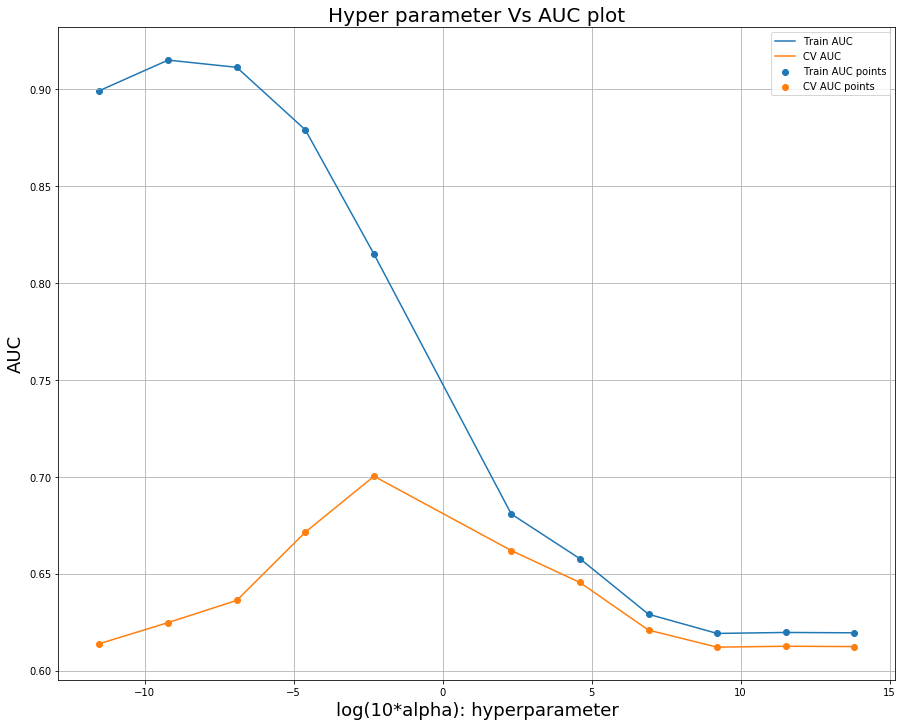

Best_hyperparameter_SGD_LR_BoW: {'alpha': 0.01}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,7.377993,1.353543,0.018988,0.002159,1e-06,{'alpha': 1e-06},0.617929,0.612606,0.611321,0.613952,0.002861,8,0.900874,0.884132,0.912330,0.899112,0.011579
1,7.934191,0.614389,0.014991,0.000003,1e-05,{'alpha': 1e-05},0.630080,0.625573,0.618814,0.624823,0.004630,6,0.915949,0.916552,0.912042,0.914848,0.001999


In [180]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
import math
from sklearn.linear_model import SGDClassifier

#LR=LogisticRegression(random_state=0,penalty='l2',class_weight='balanced')
SGD_LR=SGDClassifier(loss='log',class_weight='balanced')
#parameters = {'C':sp_randint(60, 110)}
parameters = {'alpha':[0.000001,0.00001,0.0001,0.001,0.01,1,10,100,1000,10000,100000]}

clf = GridSearchCV(SGD_LR, parameters, cv=3, scoring='roc_auc',return_train_score=True)

#https://stackoverflow.com/questions/56416576/getting-keyerror-from-sklearn-model-selection-gridsearchcv

#clf=GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc',return_train_score=True)#n_jobs=-1)

clf.fit(X_tr_bow, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
#results = results.sort_values(['param_n_neighbors'])

#https://stackoverflow.com/questions/57136676/sklearn-model-selection-gridsearchcv-is-throwing-keyerror-mean-train-score

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std=results['std_test_score']
alpha= results['param_alpha']

log_alpha_SGD_LR=[]
for i in alpha:
    x=math.log(10*i)
    log_alpha_SGD_LR.append(x)


plt.figure(figsize=(15,12))
plt.plot(log_alpha_SGD_LR, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_alpha_SGD_LR, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_alpha_SGD_LR, train_auc, label='Train AUC points')
plt.scatter(log_alpha_SGD_LR, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log(10*alpha): hyperparameter",fontsize=18)
plt.ylabel("AUC",fontsize=18)
plt.title("Hyper parameter Vs AUC plot",fontsize=20)
plt.grid()
plt.show()


best_alpha=clf.best_params_
print("="*100)
print("Best_hyperparameter_SGD_LR_BoW:",best_alpha)
Best_hyperparameter_SGD_LR_BoW=best_alpha.get("alpha")
print("="*100)
results.head(2)


<font color=blue>*__OBSERVATION:__*<br>
1.Alpha hyperparameter is varied from 0.000001 to 100000 in multiples of 10 <br>
2.Best hyperparameter is found out using GridSearchCV.best_params_ attribute<br> 
3.From best_params_ attribute of RandomizedSearchCV we get best alpha 0.01 </font>

### 3.3 Logistic Regression (SGD with log loss) (BoW) ROC Curve Plot with Best Alpha 

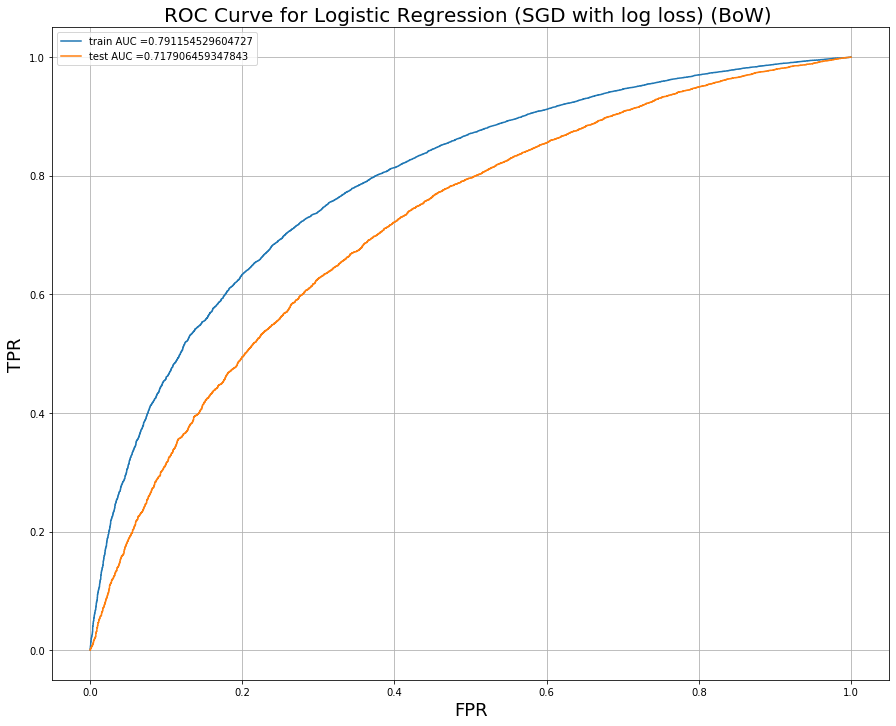

In [181]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


SGD_LR=SGDClassifier(loss='log',penalty='l2',class_weight='balanced',alpha=Best_hyperparameter_SGD_LR_BoW)
SGD_LR.fit(X_tr_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = SGD_LR.predict_proba(X_tr_bow)
train_preds = y_train_pred[:,1]  ##https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
y_test_pred = SGD_LR.predict_proba(X_test_bow)
test_preds=y_test_pred[:,1] ##https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_preds)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_preds)

plt.figure(figsize=(15,12))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR",fontsize=18)
plt.ylabel("TPR",fontsize=18)
plt.title("ROC Curve for Logistic Regression (SGD with log loss) (BoW) ",fontsize=20)
plt.grid()
plt.show()

test_AUC_BoW=""+str(auc(test_fpr, test_tpr))

<font color=blue>*__OBSERVATION:__*<br>
1.Plot of test and train AUC with Best alpha 0.01 <br>
2.From graph we can observe that train AUC =0.79 <br>
3.Test AUC=0.71<br> 
[AUC 1=best ,AUC 0=Worst]</font>

### 3.4 Confusion Matrix on test data of Logistic Regression (SGD with log loss) (BoW) 

In [182]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions



In [183]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(train_preds, best_t)))

print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(test_preds, best_t)))

the maximum value of tpr*(1-fpr) 0.5220713659315973 for threshold 0.472
Train confusion matrix
[[ 5292  2021]
 [11027 28560]]
Test confusion matrix
[[ 2243  1359]
 [ 5843 13655]]


Text(0.5, 1, 'Logistic Regression (SGD with log loss) Test Confusion Matrix (BoW)')

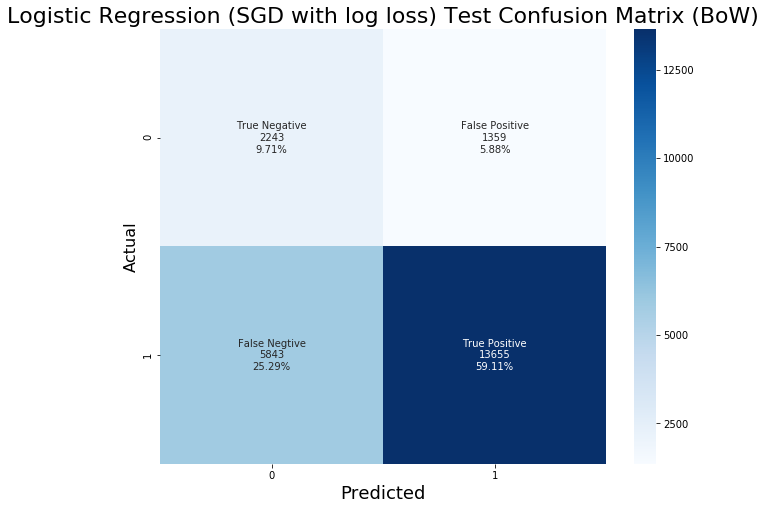

In [184]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

cf_matrix_test =confusion_matrix(y_test, predict_with_best_t(test_preds, best_t))


plt.figure(figsize=(10,8))
group_names = ['True Negative','False Positive','False Negtive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_test.flatten()/np.sum(cf_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=16)
plt.title('Logistic Regression (SGD with log loss) Test Confusion Matrix (BoW)',fontsize=22)


#sns.heatmap(cf_matrix, annot=True)

#confusion_matrix(y_test,y_data_pred)

<font color=blue>*__OBSERVATION:__*<br>
From Test Confusion Matrix Logistic Regression (SGD with log loss)(BoW) we can observe that<br> 
[There are 23100 test points]<br>
1. 2243 points with negative class are correctly classified (True Negative)<br>
2. 5843 points with negative class are incorrectly classified(False Neagtive)<br>
3. 1359 ponits with positive class are incoorectly classiefied (False Positive)<br>
4. 13655 points with positive class are correctly classified (True Positive)</font>

## 4 Applying Logistic Regression on TFIDF,<font color='red'> SET 2</font>

### 4.1 Merging all the above features for TFIDF

In [185]:
from scipy.sparse import hstack


X_tr_tfidf=hstack((X_train_essay_tfidf,X_train_project_title_tfidf,X_train_categories_one_hot,X_train_sub_categories_one_hot,
                X_train_project_grade_one_hot,X_train_school_state_one_hot,
                 X_train_teacher_prefix_one_hot,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm,X_train_quantity_norm)).tocsr()


X_test_tfidf=hstack((X_test_essay_tfidf,X_test_project_title_tfidf,X_test_categories_one_hot,X_test_sub_categories_one_hot,
                X_test_project_grade_one_hot,X_test_school_state_one_hot,
                 X_test_teacher_prefix_one_hot,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm,X_test_quantity_norm)).tocsr()


print("Final Data matrix")
print("X_tr_tfidf shape:",X_tr_tfidf.shape,"y_train:", y_train.shape)
print("X_test_tfidf shape:",X_test_tfidf.shape,"y_test:", y_test.shape)
print("="*100)


Final Data matrix
X_tr_tfidf shape: (46900, 8740) y_train: (46900,)
X_test_tfidf shape: (23100, 8740) y_test: (23100,)


### 4.2 GridSearchCV for hyperparameter tuning (best Alpha) LR (SGD with log loss)

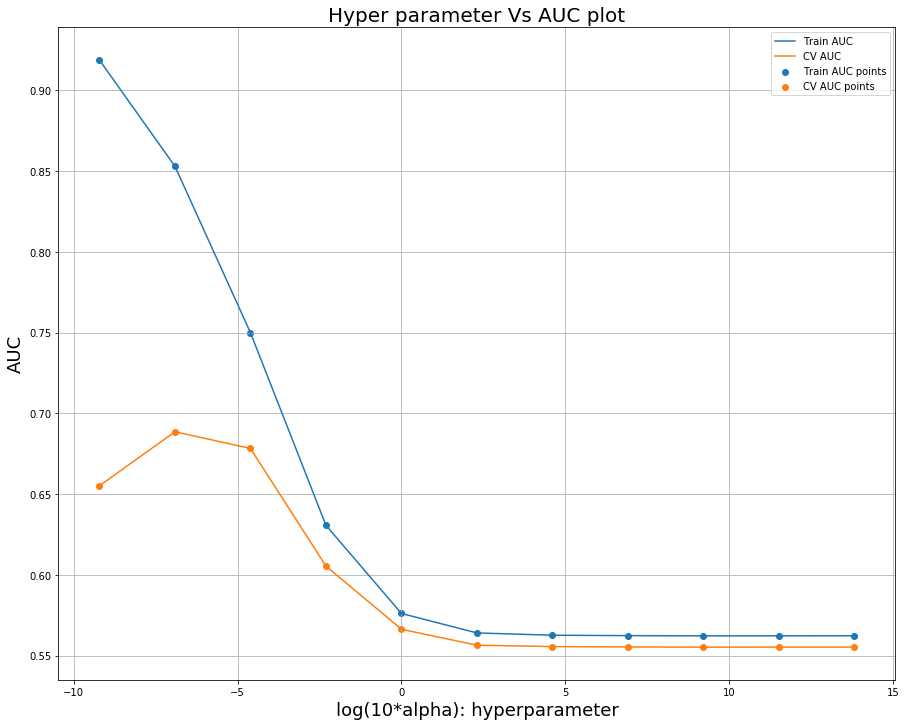

Best_hyperparameter_SGD_LR_tfidf: {'alpha': 0.0001}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.985448,0.134510,0.01699,0.000820,1e-05,{'alpha': 1e-05},0.651815,0.655350,0.658263,0.655143,0.002636,3,0.914671,0.921590,0.919873,0.918711,0.002942
1,1.003949,0.151737,0.01699,0.002159,0.0001,{'alpha': 0.0001},0.683996,0.690844,0.690882,0.688574,0.003237,1,0.856628,0.851025,0.851082,0.852911,0.002628


In [186]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
import math
from sklearn.linear_model import SGDClassifier



#LR=LogisticRegression(random_state=0,penalty='l2',class_weight='balanced')
SGD_LR=SGDClassifier(loss='log',class_weight='balanced')
#parameters = {'C':sp_randint(60, 110)}
parameters = {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]}

clf = GridSearchCV(SGD_LR, parameters, cv=3, scoring='roc_auc',return_train_score=True)

#https://stackoverflow.com/questions/56416576/getting-keyerror-from-sklearn-model-selection-gridsearchcv

#clf=GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc',return_train_score=True)#n_jobs=-1)

clf.fit(X_tr_tfidf, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
#results = results.sort_values(['param_n_neighbors'])

#https://stackoverflow.com/questions/57136676/sklearn-model-selection-gridsearchcv-is-throwing-keyerror-mean-train-score

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std=results['std_test_score']
alpha= results['param_alpha']

log_alpha_SGD_LR=[]
for i in alpha:
    x=math.log(10*i)
    log_alpha_SGD_LR.append(x)


plt.figure(figsize=(15,12))
plt.plot(log_alpha_SGD_LR, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_alpha_SGD_LR, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_alpha_SGD_LR, train_auc, label='Train AUC points')
plt.scatter(log_alpha_SGD_LR, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log(10*alpha): hyperparameter",fontsize=18)
plt.ylabel("AUC",fontsize=18)
plt.title("Hyper parameter Vs AUC plot",fontsize=20)
plt.grid()
plt.show()


best_alpha=clf.best_params_
print("="*100)
print("Best_hyperparameter_SGD_LR_tfidf:",best_alpha)
Best_hyperparameter_SGD_LR_tfidf=best_alpha.get("alpha")
print("="*100)
results.head(2)

<font color=blue>*__OBSERVATION:__*<br>
1.Alpha hyperparameter is varied from 0.000001 to 100000 in multiples of 10 <br>
2.From best_params_ attribute of GridSearchCV we get best alpha 0.0001 </font>

### 4.3 LR SGD with log loss (TFIDF) ROC curve Plot for Best Alpha 

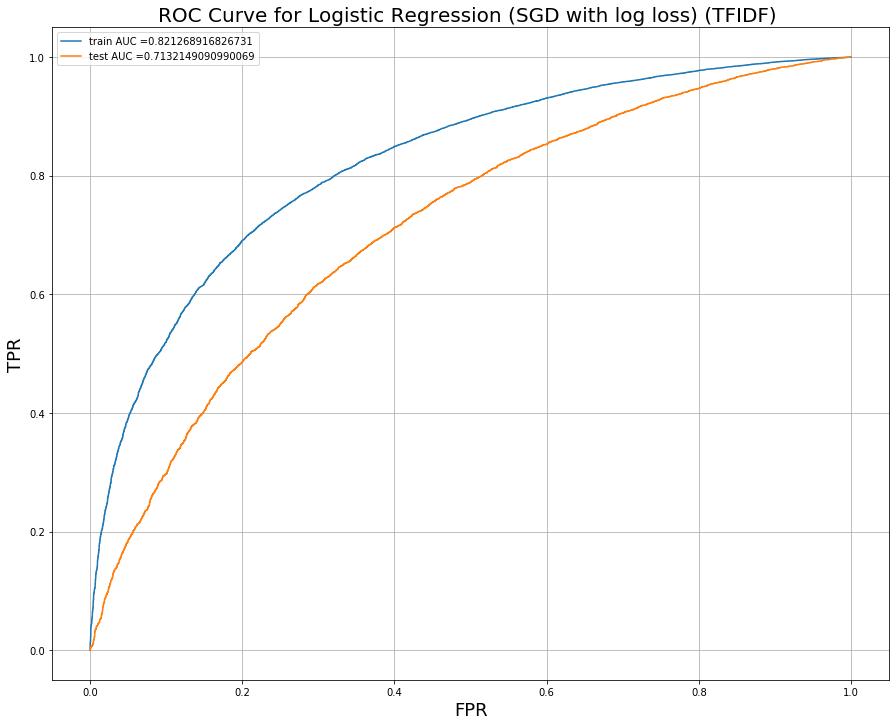

In [187]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


SGD_LR=SGDClassifier(loss='log',penalty='l2',class_weight='balanced',alpha=Best_hyperparameter_SGD_LR_tfidf)
SGD_LR.fit(X_tr_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = SGD_LR.predict_proba(X_tr_tfidf)
train_preds = y_train_pred[:,1]  ##https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
y_test_pred = SGD_LR.predict_proba(X_test_tfidf)
test_preds=y_test_pred[:,1] ##https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_preds)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_preds)

plt.figure(figsize=(15,12))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR",fontsize=18)
plt.ylabel("TPR",fontsize=18)
plt.title("ROC Curve for Logistic Regression (SGD with log loss) (TFIDF) ",fontsize=20)
plt.grid()
plt.show()

test_AUC_tfidf=""+str(auc(test_fpr, test_tpr))

<font color=blue>*__OBSERVATION:__*<br>
1.Plot of test and train AUC with Best alpha 0.0001 <br>
2.From graph we can observe that train AUC =0.82 <br>
3.Test AUC=0.71<br> 
4.As train AUC and Test AUC have difference Model is overfitting to TFIDF featurization for LR(SGD with log loss) Classifier<br>
[AUC 1=best ,AUC 0=Worst]</font>

### 4.4 Confusion Matrix on test data of LR SGD with log loss (TFIDF)

In [188]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions



In [189]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(train_preds, best_t)))

print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(test_preds, best_t)))

the maximum value of tpr*(1-fpr) 0.5579567118837842 for threshold 0.5
Train confusion matrix
[[ 5539  1774]
 [10425 29162]]
Test confusion matrix
[[ 2191  1411]
 [ 5777 13721]]


Text(0.5, 1, 'Logistic Regression (SGD with log loss)  Test Confusion Matrix (TFIDF)')

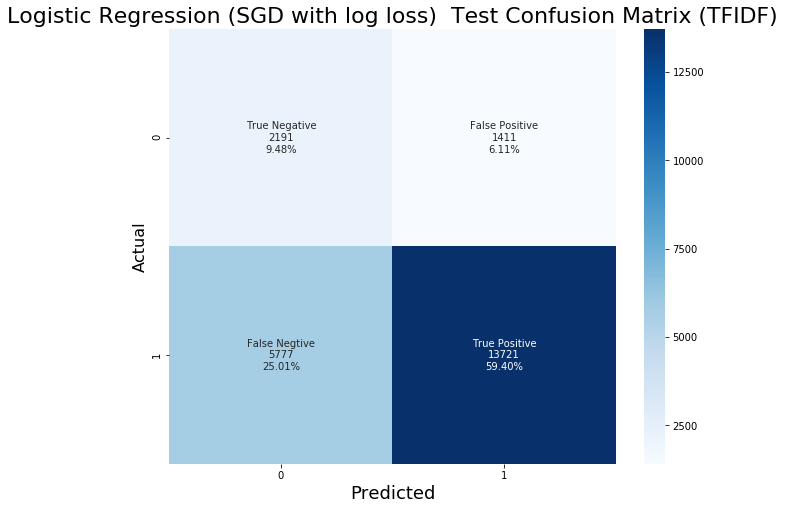

In [190]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

cf_matrix_test =confusion_matrix(y_test, predict_with_best_t(test_preds, best_t))


plt.figure(figsize=(10,8))
group_names = ['True Negative','False Positive','False Negtive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_test.flatten()/np.sum(cf_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=16)
plt.title('Logistic Regression (SGD with log loss)  Test Confusion Matrix (TFIDF)',fontsize=22)


#sns.heatmap(cf_matrix, annot=True)

#confusion_matrix(y_test,y_data_pred)

<font color=blue>*__OBSERVATION:__*<br>
From Confusion Matrix Logistic Regression (SGD with log loss) we can observe that<br>
[There are 23100 test points]<br>
1. 2191 points with negative class are correctly classified (True Negative)<br>
2. 5777 points with negative class are incorrectly classified(False Neagtive)<br>
3. 1411 ponits with positive class are incoorectly classiefied (False Positive)<br>
4. 13721 points with positive class are correctly classified (True Positive)</font>

## 5 Applying Logistic Regression on avg_w2v,<font color='red'> SET 3</font>

### 5.1 Merging all the above features for avg_w2v

In [191]:
from scipy.sparse import hstack


X_tr_avg_w2v=hstack((X_train_essays_avg_w2v_,X_train_project_title_avg_w2v_,X_train_categories_one_hot,X_train_sub_categories_one_hot,
                X_train_project_grade_one_hot,X_train_school_state_one_hot,
                 X_train_teacher_prefix_one_hot,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm,X_train_quantity_norm)).tocsr()


X_test_avg_w2v=hstack((X_test_essays_avg_w2v_,X_test_project_title_avg_w2v_,X_test_categories_one_hot,X_test_sub_categories_one_hot,
                X_test_project_grade_one_hot,X_test_school_state_one_hot,
                 X_test_teacher_prefix_one_hot,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm,X_test_quantity_norm)).tocsr()


print("Final Data matrix")
print("X_tr_avg_w2v shape:",X_tr_avg_w2v.shape,", y_train:", y_train.shape)
print("X_test_avg_w2v shape:",X_test_avg_w2v.shape,", y_test:", y_test.shape)
print("="*100)

Final Data matrix
X_tr_avg_w2v shape: (46900, 703) , y_train: (46900,)
X_test_avg_w2v shape: (23100, 703) , y_test: (23100,)


### 5.2 GridSearchCV for hyperparameter tuning (best Alpha) LR SGD with log loss (avg_w2v)

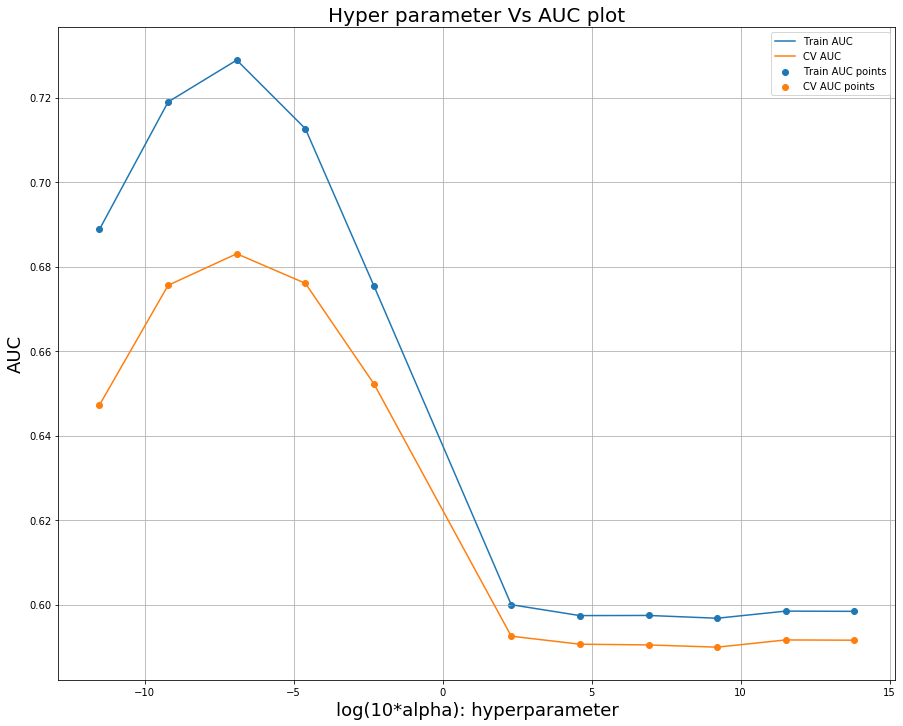

Best_hyperparameter_SGD_LR_avg_w2v: {'alpha': 0.0001}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,21.274427,2.188744,0.038641,0.000470,1e-06,{'alpha': 1e-06},0.643548,0.651201,0.647079,0.647276,0.003127,5,0.685202,0.692077,0.689286,0.688855,0.002823
1,14.877207,1.806196,0.041307,0.001885,1e-05,{'alpha': 1e-05},0.677460,0.682628,0.666763,0.675617,0.006607,3,0.718228,0.726440,0.712362,0.719010,0.005774


In [192]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
import math
from sklearn.linear_model import SGDClassifier

#LR=LogisticRegression(random_state=0,penalty='l2',class_weight='balanced')
SGD_LR=SGDClassifier(loss='log',class_weight='balanced')
#parameters = {'C':sp_randint(60, 110)}
parameters = {'alpha':[0.000001,0.00001,0.0001,0.001,0.01,1,10,100,1000,10000,100000]}

clf = GridSearchCV(SGD_LR, parameters, cv=3, scoring='roc_auc',return_train_score=True)

#https://stackoverflow.com/questions/56416576/getting-keyerror-from-sklearn-model-selection-gridsearchcv

#clf=GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc',return_train_score=True)#n_jobs=-1)

clf.fit(X_tr_avg_w2v, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
#results = results.sort_values(['param_n_neighbors'])

#https://stackoverflow.com/questions/57136676/sklearn-model-selection-gridsearchcv-is-throwing-keyerror-mean-train-score

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std=results['std_test_score']
alpha= results['param_alpha']

log_alpha_SGD_LR=[]
for i in alpha:
    x=math.log(10*i)
    log_alpha_SGD_LR.append(x)


plt.figure(figsize=(15,12))
plt.plot(log_alpha_SGD_LR, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_alpha_SGD_LR, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_alpha_SGD_LR, train_auc, label='Train AUC points')
plt.scatter(log_alpha_SGD_LR, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log(10*alpha): hyperparameter",fontsize=18)
plt.ylabel("AUC",fontsize=18)
plt.title("Hyper parameter Vs AUC plot",fontsize=20)
plt.grid()
plt.show()


best_alpha=clf.best_params_
print("="*100)
print("Best_hyperparameter_SGD_LR_avg_w2v:",best_alpha)
Best_hyperparameter_SGD_LR_avg_w2v=best_alpha.get("alpha")
print("="*100)
results.head(2)


<font color=blue>*__OBSERVATION:__*<br>
1.Alpha hyperparameter is varied from 0.000001 to 100000 in multiples of 10 <br>
2.From best_params_ attribute of GridSearchCV we get best alpha 0.0001 </font>

### 5.3 LR SGD with log loss ROC curve plot for Best Alpha(avg_w2v) 

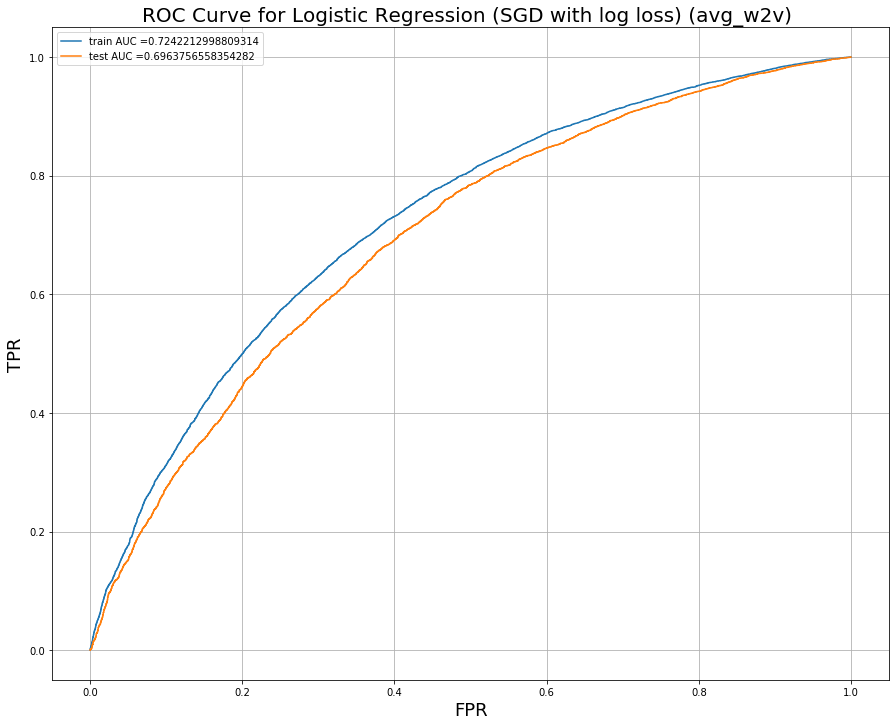

In [193]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


SGD_LR=SGDClassifier(loss='log',penalty='l2',class_weight='balanced',alpha=Best_hyperparameter_SGD_LR_avg_w2v)
SGD_LR.fit(X_tr_avg_w2v, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = SGD_LR.predict_proba(X_tr_avg_w2v)
train_preds = y_train_pred[:,1]  ##https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
y_test_pred = SGD_LR.predict_proba(X_test_avg_w2v)
test_preds=y_test_pred[:,1] ##https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_preds)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_preds)

plt.figure(figsize=(15,12))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR",fontsize=18)
plt.ylabel("TPR",fontsize=18)
plt.title("ROC Curve for Logistic Regression (SGD with log loss) (avg_w2v) ",fontsize=20)
plt.grid()
plt.show()

test_AUC_avg_w2v=""+str(auc(test_fpr, test_tpr))

<font color=blue>*__OBSERVATION:__*<br>
1.Plot of test and train AUC with Best alpha 0.0001 <br>
2.From graph we can observe that train AUC =0.72 <br>
3.Test AUC=0.69<br> 
[AUC 1=best ,AUC 0=Worst]</font>

### 5.4 Confusion Matrix on test data of LR SGD with log loss (avg w2v)

In [194]:
#source::appliedAI course sample solutions

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t


def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions



In [195]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(train_preds, best_t)))

print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(test_preds, best_t)))

the maximum value of tpr*(1-fpr) 0.4461329257677272 for threshold 0.572
Train confusion matrix
[[ 4898  2415]
 [13218 26369]]
Test confusion matrix
[[ 2306  1296]
 [ 6847 12651]]


Text(0.5, 1, 'Logistic Regression (SGD with log loss) (avg_w2v) Test Confusion Matrix ')

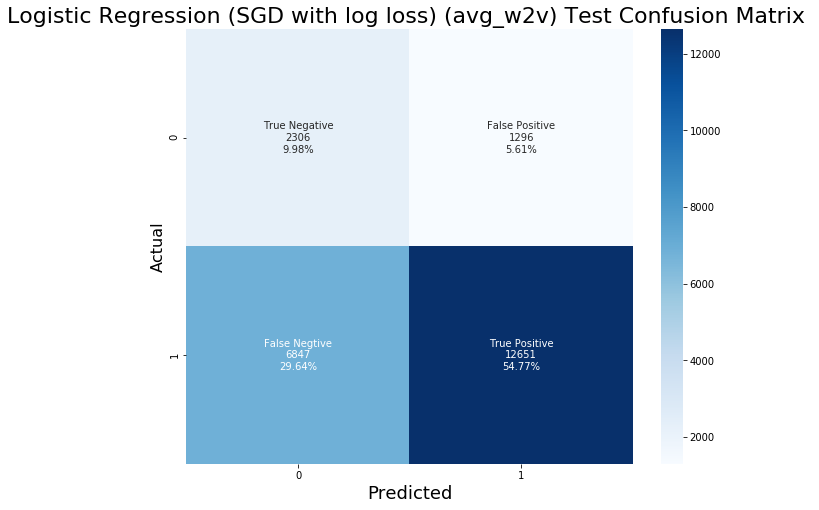

In [196]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

cf_matrix_test =confusion_matrix(y_test, predict_with_best_t(test_preds, best_t))


plt.figure(figsize=(10,8))
group_names = ['True Negative','False Positive','False Negtive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_test.flatten()/np.sum(cf_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=16)
plt.title('Logistic Regression (SGD with log loss) (avg_w2v) Test Confusion Matrix ',fontsize=22)


#sns.heatmap(cf_matrix, annot=True)

#confusion_matrix(y_test,y_data_pred)

<font color=blue>*__OBSERVATION:__*<br>
From Confusion Matrix LR SGD with log loss we can observe that<br>
[There are 23100 test points]<br>
1. 2306 points with negative class are correctly classified (True Negative)<br>
2. 6847 points with negative class are incorrectly classified(False Neagtive)<br>
3. 1296 ponits with positive class are incoorectly classiefied (False Positive)<br>
4. 12651 points with positive class are correctly classified (True Positive)</font>

## 6 Applying Logistic Regression (SGD with log loss) TFIDF W2V,<font color='red'> SET 4</font>

### 6.1 Merging all the above features for TFIDF W2V

In [197]:
from scipy.sparse import hstack


X_tr_tfidf_w2v_vectors=hstack((X_train_essays_tfidf_w2v_vectors,X_train_project_title_tfidf_w2v_vectors,X_train_categories_one_hot,X_train_sub_categories_one_hot,
                X_train_project_grade_one_hot,X_train_school_state_one_hot,
                 X_train_teacher_prefix_one_hot,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm,X_train_quantity_norm)).tocsr()



X_test_tfidf_w2v_vectors=hstack((X_test_essays_tfidf_w2v_vectors,X_test_project_title_tfidf_w2v_vectors,X_test_categories_one_hot,X_test_sub_categories_one_hot,
                X_test_project_grade_one_hot,X_test_school_state_one_hot,
                 X_test_teacher_prefix_one_hot,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm,X_test_quantity_norm)).tocsr()


print("Final Data matrix")
print("X_tr_tfidf_w2v_vectors shape:",X_tr_tfidf_w2v_vectors.shape,"y_train:", y_train.shape)
print("X_test_tfidf_w2v_vectors shape:",X_test_tfidf_w2v_vectors.shape,"y_test:", y_test.shape)
print("="*100)

Final Data matrix
X_tr_tfidf_w2v_vectors shape: (46900, 703) y_train: (46900,)
X_test_tfidf_w2v_vectors shape: (23100, 703) y_test: (23100,)


### 6.2 GridSearchCV for hyperparameter tuning (best Alpha) LR SGD with log loss (tfidf_w2v)

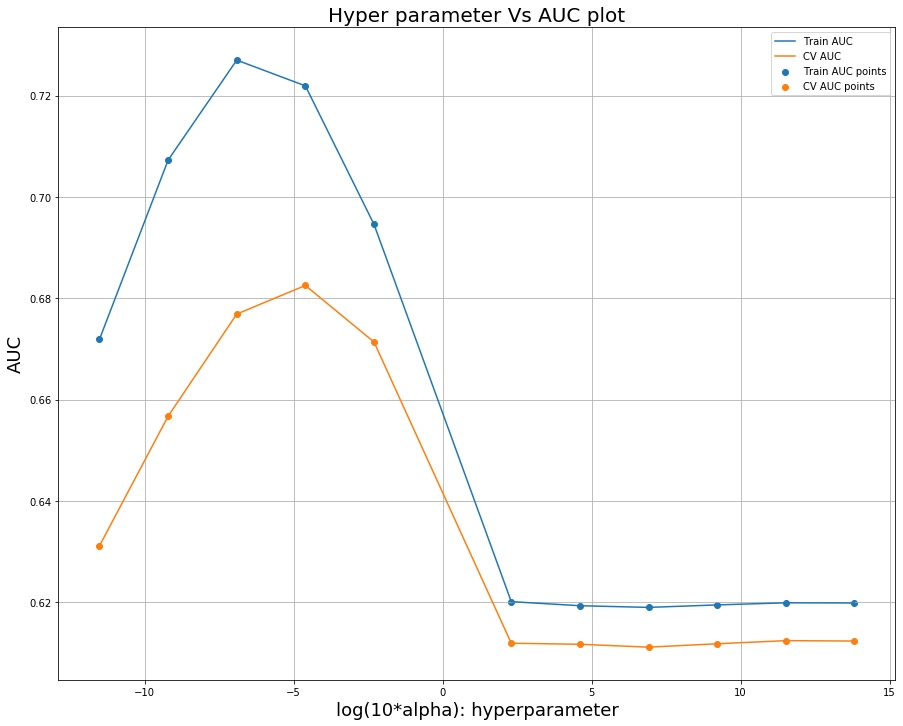

Best_hyperparameter_SGD_LR_tfidf_w2v: {'alpha': 0.001}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,19.412766,2.075012,0.040975,0.002827,1e-06,{'alpha': 1e-06},0.621184,0.638582,0.633733,0.631166,0.007331,5,0.661168,0.681973,0.672630,0.671924,0.008508
1,15.320885,1.280748,0.038643,0.001246,1e-05,{'alpha': 1e-05},0.657280,0.648086,0.664895,0.656753,0.006872,4,0.703128,0.700337,0.718446,0.707304,0.007961


In [198]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
import math
from sklearn.linear_model import SGDClassifier

#LR=LogisticRegression(random_state=0,penalty='l2',class_weight='balanced')
SGD_LR=SGDClassifier(loss='log',class_weight='balanced')
#parameters = {'C':sp_randint(60, 110)}
parameters = {'alpha':[0.000001,0.00001,0.0001,0.001,0.01,1,10,100,1000,10000,100000]}

clf = GridSearchCV(SGD_LR, parameters, cv=3, scoring='roc_auc',return_train_score=True)

#https://stackoverflow.com/questions/56416576/getting-keyerror-from-sklearn-model-selection-gridsearchcv

#clf=GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc',return_train_score=True)#n_jobs=-1)

clf.fit(X_tr_tfidf_w2v_vectors, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
#results = results.sort_values(['param_n_neighbors'])

#https://stackoverflow.com/questions/57136676/sklearn-model-selection-gridsearchcv-is-throwing-keyerror-mean-train-score

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std=results['std_test_score']
alpha= results['param_alpha']

log_alpha_SGD_LR=[]
for i in alpha:
    x=math.log(10*i)
    log_alpha_SGD_LR.append(x)


plt.figure(figsize=(15,12))
plt.plot(log_alpha_SGD_LR, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_alpha_SGD_LR, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_alpha_SGD_LR, train_auc, label='Train AUC points')
plt.scatter(log_alpha_SGD_LR, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log(10*alpha): hyperparameter",fontsize=18)
plt.ylabel("AUC",fontsize=18)
plt.title("Hyper parameter Vs AUC plot",fontsize=20)
plt.grid()
plt.show()


best_alpha=clf.best_params_
print("="*100)
print("Best_hyperparameter_SGD_LR_tfidf_w2v:",best_alpha)
Best_hyperparameter_SGD_LR_tfidf_w2v=best_alpha.get("alpha")
print("="*100)
results.head(2)


<font color=blue>*__OBSERVATION:__*<br>
1.Alpha hyperparameter is varied from 0.000001 to 100000 in multiples of 10 <br>
2.From best_params_ attribute of GridSearchCV we get best alpha  0.001 </font>

### 6.3  LR SGD with log loss (tfidf_w2v) ROC curve Plot for Best Alpha 

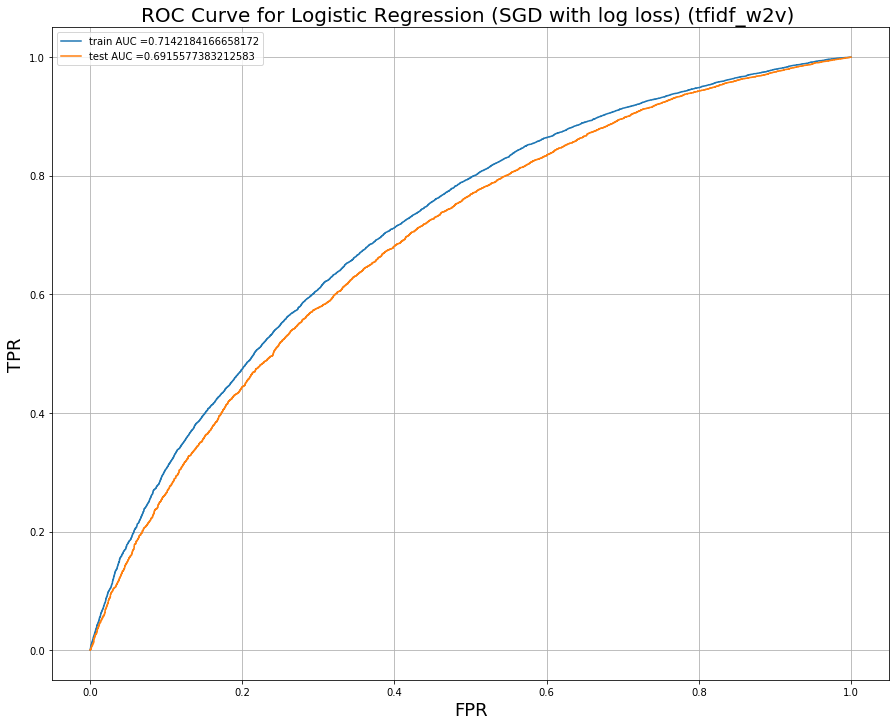

In [199]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


SGD_LR=SGDClassifier(loss='log',penalty='l2',class_weight='balanced',alpha=Best_hyperparameter_SGD_LR_tfidf_w2v)
SGD_LR.fit(X_tr_tfidf_w2v_vectors , y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = SGD_LR.predict_proba(X_tr_tfidf_w2v_vectors)
train_preds = y_train_pred[:,1]  ##https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
y_test_pred = SGD_LR.predict_proba(X_test_tfidf_w2v_vectors)
test_preds=y_test_pred[:,1] ##https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_preds)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_preds)

plt.figure(figsize=(15,12))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR",fontsize=18)
plt.ylabel("TPR",fontsize=18)
plt.title("ROC Curve for Logistic Regression (SGD with log loss) (tfidf_w2v) ",fontsize=20)
plt.grid()
plt.show()

test_AUC_tfidf_avg_w2v=""+str(auc(test_fpr, test_tpr))

<font color=blue>*__OBSERVATION:__*<br>
1.Plot of test and train AUC with Best alpha  0.001 <br>
2.From graph we can observe that train AUC =0.71 <br>
3.Test AUC=0.69<br> 
[AUC 1=best ,AUC 0=Worst]</font>

### 6.4 Confusion Matrix on test data of  LR SGD with log loss (tfidf_w2v)

In [200]:
#source::appliedAI course 

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [201]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(train_preds, best_t)))

print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(test_preds, best_t)))

the maximum value of tpr*(1-fpr) 0.43285093415164516 for threshold 0.453
Train confusion matrix
[[ 4631  2682]
 [12528 27059]]
Test confusion matrix
[[ 2219  1383]
 [ 6475 13023]]


Text(0.5, 1, 'Logistic Regression (SGD with log loss) Test Confusion Matrix (avg_w2v)')

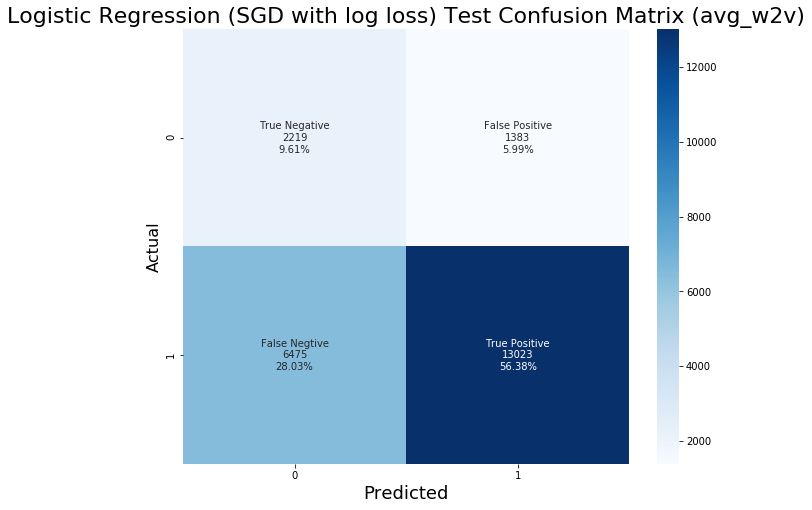

In [202]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

cf_matrix_test =confusion_matrix(y_test, predict_with_best_t(test_preds, best_t))


plt.figure(figsize=(10,8))
group_names = ['True Negative','False Positive','False Negtive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_test.flatten()/np.sum(cf_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=16)
plt.title('Logistic Regression (SGD with log loss) Test Confusion Matrix (avg_w2v)',fontsize=22)


#sns.heatmap(cf_matrix, annot=True)

#confusion_matrix(y_test,y_data_pred)

<font color=blue>*__OBSERVATION:__*<br>
From Test Confusion Matrix Logistic Regression (SGD with log loss) we can observe that<br>
[There are 23100 test points]<br>
1. 2219 points with negative class are correctly classified (True Negative)<br>
2. 6475 points with negative class are incorrectly classified(False Neagtive)<br>
3. 1383 ponits with positive class are incoorectly classiefied (False Positive)<br>
4. 13023 points with positive class are correctly classified (True Positive)</font>

 ## 7 Applying  Logistic Regression SGD with log loss on Categorical & Numerical features  only <font color='red'> SET 5</font>

### 7.1 Merging all the above features for Categorical & Numerical

In [203]:

from scipy.sparse import hstack


X_tr_categorical_numerical=hstack((X_train_sentiment_score_norm,X_train_number_words_essays_norm,X_train_number_words_project_title_norm,X_train_categories_one_hot,X_train_sub_categories_one_hot,
                X_train_project_grade_one_hot,X_train_school_state_one_hot,X_train_teacher_prefix_one_hot,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm,X_train_quantity_norm)).tocsr()


X_test_categorical_numerical=hstack((X_test_sentiment_score_norm,X_test_number_words_essays_norm,X_test_number_words_project_title_norm,X_test_categories_one_hot,X_test_sub_categories_one_hot,
                X_test_project_grade_one_hot,X_test_school_state_one_hot,X_test_teacher_prefix_one_hot,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm,X_test_quantity_norm)).tocsr()


print("Final Data matrix")
print("X_tr_categorical_numerical shape:",X_tr_categorical_numerical.shape,"y_train:", y_train.shape)
print("X_test_categorical_numerical shape:",X_test_categorical_numerical.shape,"y_test:", y_test.shape)
print("="*100)

Final Data matrix
X_tr_categorical_numerical shape: (46900, 106) y_train: (46900,)
X_test_categorical_numerical shape: (23100, 106) y_test: (23100,)


### 7.2 GridSearchCV for hyperparameter tuning (best Alpha) Logistic Regression SGD with log loss Categorical & Numerical features only

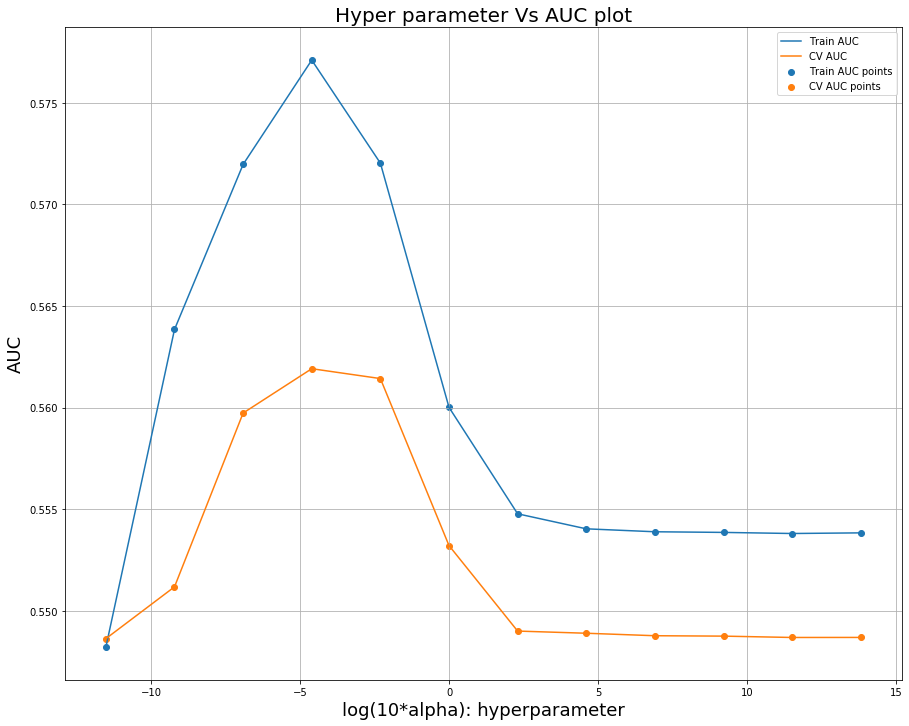

Best_hyperparameter_SGD_LR_categorical_numeric: {'alpha': 0.001}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.399952,0.242032,0.009661,0.000471,1e-06,{'alpha': 1e-06},0.554753,0.540224,0.550953,0.548643,0.006152,12,0.545253,0.543645,0.555774,0.548224,0.005379
1,0.682592,0.060387,0.008996,0.000002,1e-05,{'alpha': 1e-05},0.548027,0.556162,0.549385,0.551192,0.003558,5,0.562314,0.565436,0.563803,0.563851,0.001275


In [204]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
import math
from sklearn.linear_model import SGDClassifier

#LR=LogisticRegression(random_state=0,penalty='l2',class_weight='balanced')
SGD_LR=SGDClassifier(loss='log',class_weight='balanced')
#parameters = {'C':sp_randint(60, 110)}
parameters = {'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]}

clf = GridSearchCV(SGD_LR, parameters, cv=3, scoring='roc_auc',return_train_score=True)

#https://stackoverflow.com/questions/56416576/getting-keyerror-from-sklearn-model-selection-gridsearchcv

#clf=GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc',return_train_score=True)#n_jobs=-1)

clf.fit(X_tr_categorical_numerical, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
#results = results.sort_values(['param_n_neighbors'])

#https://stackoverflow.com/questions/57136676/sklearn-model-selection-gridsearchcv-is-throwing-keyerror-mean-train-score

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std=results['std_test_score']
alpha= results['param_alpha']

log_alpha_SGD_LR=[]
for i in alpha:
    x=math.log(10*i)
    log_alpha_SGD_LR.append(x)


plt.figure(figsize=(15,12))
plt.plot(log_alpha_SGD_LR, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_alpha_SGD_LR, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_alpha_SGD_LR, train_auc, label='Train AUC points')
plt.scatter(log_alpha_SGD_LR, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log(10*alpha): hyperparameter",fontsize=18)
plt.ylabel("AUC",fontsize=18)
plt.title("Hyper parameter Vs AUC plot",fontsize=20)
plt.grid()
plt.show()


best_alpha=clf.best_params_
print("="*100)
print("Best_hyperparameter_SGD_LR_categorical_numeric:",best_alpha)
Best_hyperparameter_SGD_LR_categorical_numeric=best_alpha.get("alpha")
print("="*100)
results.head(2)

<font color=blue>*__OBSERVATION:__*<br>
1.Alpha hyperparameter is varied from 0.000001 to 100000 in multiples of 10 <br>
2.From best_params_ attribute of GridSearchCV we get best alpha 0.001 </font>

### 7.3  Logistic Regression SGD with log loss on Categorical & Numerical ,ROC curve Plot for Best Alpha 

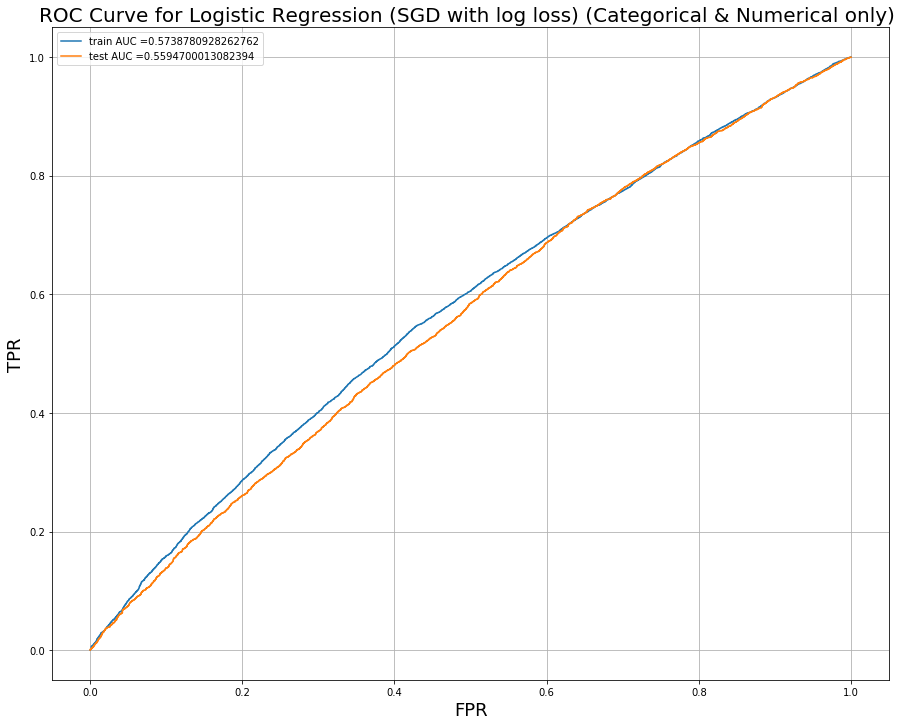

In [205]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


SGD_LR=SGDClassifier(loss='log',class_weight='balanced',alpha=Best_hyperparameter_SGD_LR_categorical_numeric)
SGD_LR.fit(X_tr_categorical_numerical  , y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = SGD_LR.predict_proba(X_tr_categorical_numerical)
train_preds = y_train_pred[:,1]  ##https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
y_test_pred = SGD_LR.predict_proba(X_test_categorical_numerical)
test_preds=y_test_pred[:,1] ##https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_preds)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_preds)

plt.figure(figsize=(15,12))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR",fontsize=18)
plt.ylabel("TPR",fontsize=18)
plt.title("ROC Curve for Logistic Regression (SGD with log loss) (Categorical & Numerical only) ",fontsize=20)
plt.grid()
plt.show()

test_AUC_categorical_numerical_only=""+str(auc(test_fpr, test_tpr))

<font color=blue>*__OBSERVATION:__*<br>
1.Plot of test and train AUC with Best alpha 0.001 <br>
2.From graph we can observe that train AUC =0.57 <br>
3.Test AUC=0.55<br> 
4.When text features are taking into featurization the test AUC and Train AUC is dropping therefore text features are important features<br>
[AUC 1=best ,AUC 0=Worst]</font>

### 7.4 Confusion Matrix on test data of Logistic Regression SGD with log loss on Categorical & Numerical

the maximum value of tpr*(1-fpr) 0.31243210032550944 for threshold 0.491
Train confusion matrix
-------------------------
[[ 4183  3130]
 [17964 21623]]
Test confusion matrix
-------------------------
[[ 1927  1675]
 [ 8902 10596]]


Text(0.5, 1, 'Logistic Regression (SGD with log loss) Test Confusion Matrix (Categorical & Numerical only)')

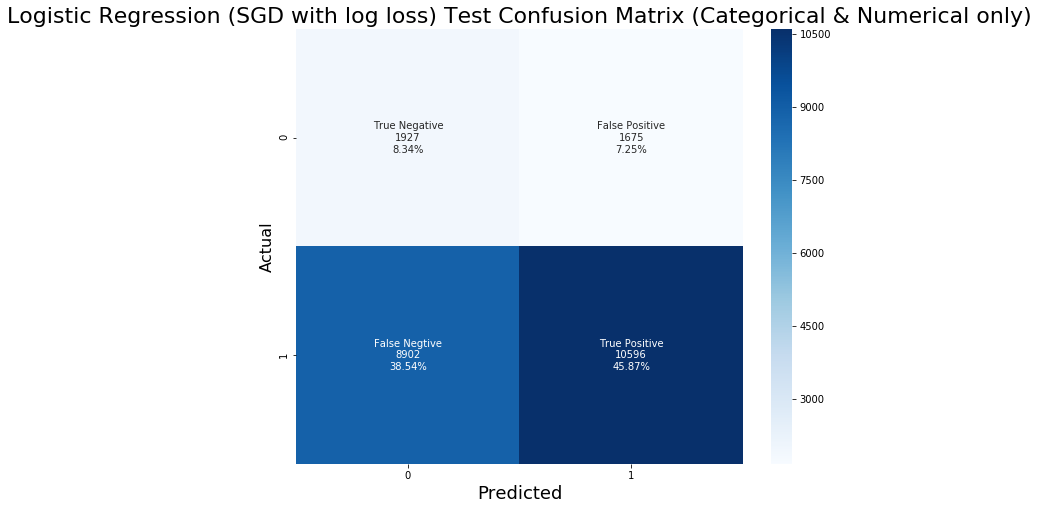

In [206]:
#source::appliedAI course 

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("="*100)
print("Train confusion matrix")
print("-"*25)
print(confusion_matrix(y_train, predict_with_best_t(train_preds, best_t)))
print("="*100)
print("Test confusion matrix")
print("-"*25)
print(confusion_matrix(y_test, predict_with_best_t(test_preds, best_t)))
print("="*100)


#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

cf_matrix_test =confusion_matrix(y_test, predict_with_best_t(test_preds, best_t))


plt.figure(figsize=(10,8))
group_names = ['True Negative','False Positive','False Negtive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_test.flatten()/np.sum(cf_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=16)
plt.title('Logistic Regression (SGD with log loss) Test Confusion Matrix (Categorical & Numerical only)',fontsize=22)


#sns.heatmap(cf_matrix, annot=True)

#confusion_matrix(y_test,y_data_pred)

<font color=blue>*__OBSERVATION:__*<br>
From Test Confusion Matrix Logistic Regression (SGD with log loss) we can observe that<br>
[There are 23100 test points]<br>
1. 1927 points with negative class are correctly classified (True Negative)<br>
2. 8902 points with negative class are incorrectly classified(False Neagtive)<br>
3. 1675 ponits with positive class are incoorectly classiefied (False Positive)<br>
4. 10596 points with positive class are correctly classified (True Positive)</font>

<h1> 8 Conclusions</h1>

In [207]:
#!/usr/bin/python3

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Test AUC", "alpha Hyperparameter"]

x.add_row(["BOW", "Logistic_Regression_SGD_log_loss", test_AUC_BoW, Best_hyperparameter_SGD_LR_BoW])
x.add_row(["TFIDF", "Logistic_Regression_SGD_log_loss", test_AUC_tfidf, Best_hyperparameter_SGD_LR_tfidf])
x.add_row(["avgW2V", "Logistic_Regression_SGD_log_loss", test_AUC_avg_w2v, Best_hyperparameter_SGD_LR_avg_w2v])
x.add_row(["TFIDF_W2V", "Logistic_Regression_SGD_log_loss", test_AUC_tfidf_avg_w2v, Best_hyperparameter_SGD_LR_tfidf_w2v])
x.add_row(["Categorical & Numerical Only", "Logistic_Regression_SGD_log_loss", test_AUC_categorical_numerical_only, Best_hyperparameter_SGD_LR_tfidf_w2v])

print(x)

+------------------------------+----------------------------------+--------------------+----------------------+
|          Vectorizer          |              Model               |      Test AUC      | alpha Hyperparameter |
+------------------------------+----------------------------------+--------------------+----------------------+
|             BOW              | Logistic_Regression_SGD_log_loss | 0.717906459347843  |         0.01         |
|            TFIDF             | Logistic_Regression_SGD_log_loss | 0.7132149090990069 |        0.0001        |
|            avgW2V            | Logistic_Regression_SGD_log_loss | 0.6963756558354282 |        0.0001        |
|          TFIDF_W2V           | Logistic_Regression_SGD_log_loss | 0.6915577383212583 |        0.001         |
| Categorical & Numerical Only | Logistic_Regression_SGD_log_loss | 0.5594700013082394 |        0.001         |
+------------------------------+----------------------------------+--------------------+----------------

<font color=blue>*__OBSERVATION:__*<br>
1.Test AUC of LR(SGD with log loss) for BoW featurization is 0.71 when alpha is 0.01<br> 
2.Test AUC of LR(SGD with log loss) for TFIDF featurization is 0.71 when alpha is 0.0001 <font color=red>(*Slightly overfits*)<br> <font color=blue>
3.Test AUC of LR(SGD with log loss) for avgW2V featurization is 0.69 when alpha is 0.0001 <br>
4.Test AUC of LR(SGD with log loss) for tfidf_w2v featurization is 0.69 when alpha is 0.001<br>
    5.Test AUC of LR(SGD with log loss) for Categorical & Numerical Features only (no text features) featurization is 0.55 when alpha is 0.001.<br>
    6.When we not taking text features, LR(SGD with log loss )Classifier is giving test auc of 0.55 only<br>
    <font color=red>7.THEREFORE TEXT FEATURES ARE IMPORTANT <br>
</font>
<font color=red>[Best AUC score =1,<br>Worst AUC score =0]<br>
</font>